In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import os

DATA_DIR = "/content/drive/MyDrive/3RD_SEM_PROJ/train"
folders = os.listdir(DATA_DIR)
print(folders)


In [ ]:
EMOTIONS = ['surprise', 'neutral', 'fear', 'angry', 'happy', 'sad', 'disgust']
IMG_SIZE = 48

In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

DATA_DIR = "/content/drive/MyDrive/3RD_SEM_PROJ/train"
EMOTIONS = ['surprise', 'neutral', 'fear', 'angry', 'happy', 'sad', 'disgust']
IMG_SIZE = 48

def load_data():
    images = []
    labels = []

    # Print folders for debugging
    print("Folders found:", os.listdir(DATA_DIR))

    for label, emotion in enumerate(EMOTIONS):
        emotion_dir = os.path.join(DATA_DIR, emotion)   # <-- FIXED

        if not os.path.isdir(emotion_dir):
            print(f"Directory NOT found for {emotion}: {emotion_dir}")
            continue

        print(f"Loading {emotion} from {emotion_dir}")

        for img_file in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_file)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                # Skip corrupted images
                continue

            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)


# Load Data
images, labels = load_data()
images, labels = shuffle(images, labels, random_state=42)
print("Total images loaded:", len(images))

# Split only if images exist
if len(images) == 0:
    raise Exception("❌ ERROR: No images found. Check dataset folder names!")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("Data Loaded Successfully!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Folders found: ['surprise', 'neutral', 'fear', 'angry', 'happy', 'sad', 'disgust']
Loading surprise from /content/drive/MyDrive/3RD_SEM_PROJ/train/surprise
Loading neutral from /content/drive/MyDrive/3RD_SEM_PROJ/train/neutral
Loading fear from /content/drive/MyDrive/3RD_SEM_PROJ/train/fear
Loading angry from /content/drive/MyDrive/3RD_SEM_PROJ/train/angry
Loading happy from /content/drive/MyDrive/3RD_SEM_PROJ/train/happy
Loading sad from /content/drive/MyDrive/3RD_SEM_PROJ/train/sad
Loading disgust from /content/drive/MyDrive/3RD_SEM_PROJ/train/disgust
Total images loaded: 28821
Data Loaded Successfully!
Train shape: (23056, 48, 48, 1)
Test shape: (5765, 48, 48, 1)


Number of images: 28821
Shape of images array: (28821, 48, 48)
Number of labels: 28821


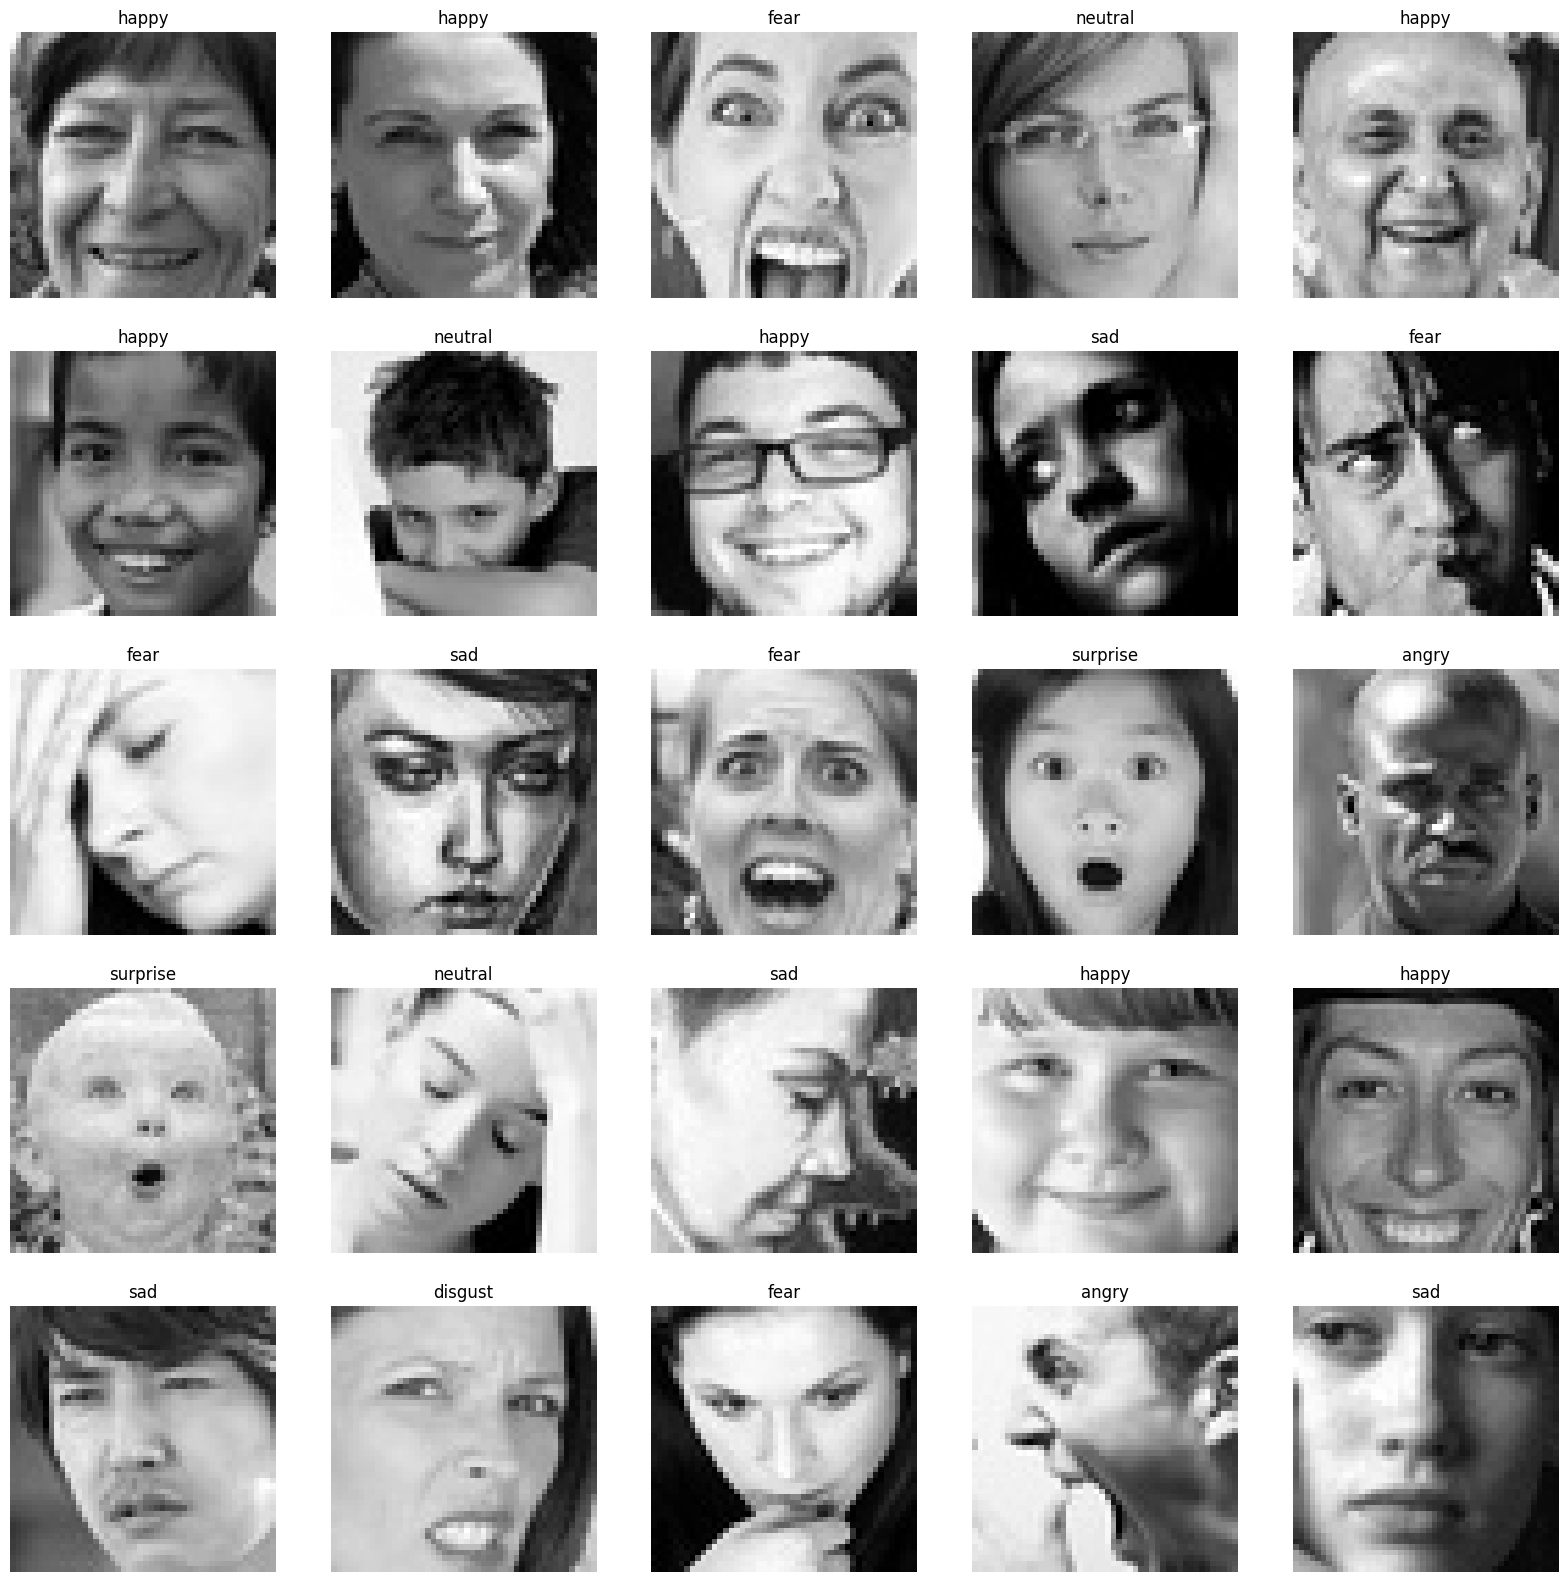

In [ ]:
print("Number of images:", len(images))
print("Shape of images array:", images.shape)
print("Number of labels:", len(labels))

# Print sample images and their corresponding labels
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(EMOTIONS[labels[i]])
    plt.axis('off')
plt.show()

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [ ]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(len(EMOTIONS), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,255 (1.85 MB)

 Trainable params: 485,255 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


721/721 ━━━━━━━━━━━━━━━━━━━━ 225s 308ms/step - accuracy: 0.2336 - loss: 1.8379 - val_accuracy: 0.2878 - val_loss: 1.7172
Epoch 2/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 211s 293ms/step - accuracy: 0.2753 - loss: 1.7424 - val_accuracy: 0.3424 - val_loss: 1.6254
Epoch 3/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 213s 296ms/step - accuracy: 0.3323 - loss: 1.6743 - val_accuracy: 0.4095 - val_loss: 1.5170
Epoch 4/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 212s 294ms/step - accuracy: 0.3841 - loss: 1.5719 - val_accuracy: 0.4538 - val_loss: 1.3843
Epoch 5/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 268s 303ms/step - accuracy: 0.4231 - loss: 1.4866 - val_accuracy: 0.4834 - val_loss: 1.3364
Epoch 6/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 254s 293ms/step - accuracy: 0.4483 - loss: 1.4428 - val_accuracy: 0.5006 - val_loss: 1.2900
Epoch 7/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 209s 289ms/step - accuracy: 0.4620 - loss: 1.4134 - val_accuracy: 0.5143 - val_loss: 1.2485
Epoch 8/50
721/721 ━━━━━━━━━━━━━━━━━━━━ 210s 291ms/step - accuracy: 0.4729 - loss: 1.38

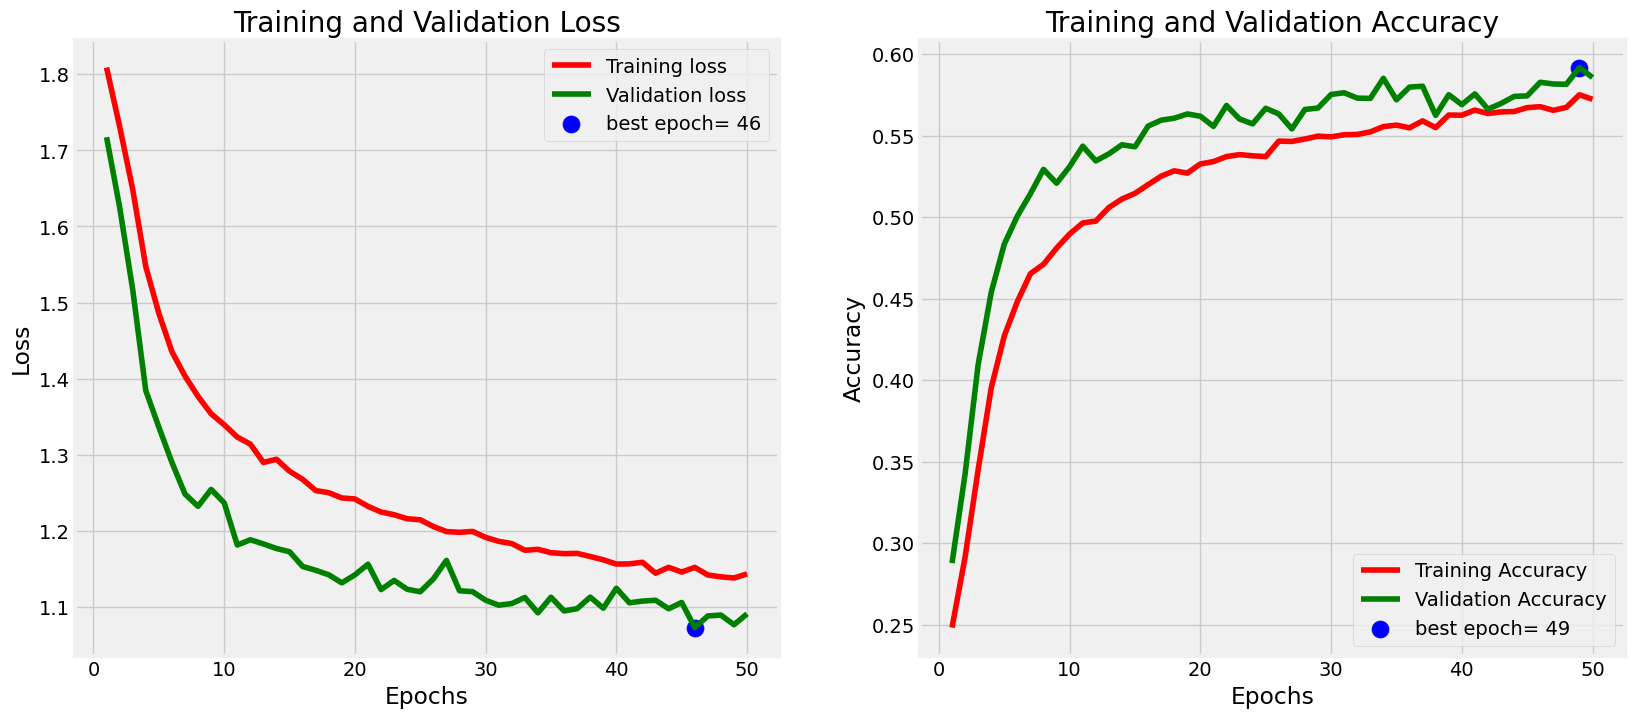

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

181/181 - 13s - 69ms/step - accuracy: 0.5856 - loss: 1.0911
Test Loss: 1.0910747051239014
Test Accuracy: 0.5856027603149414


181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step


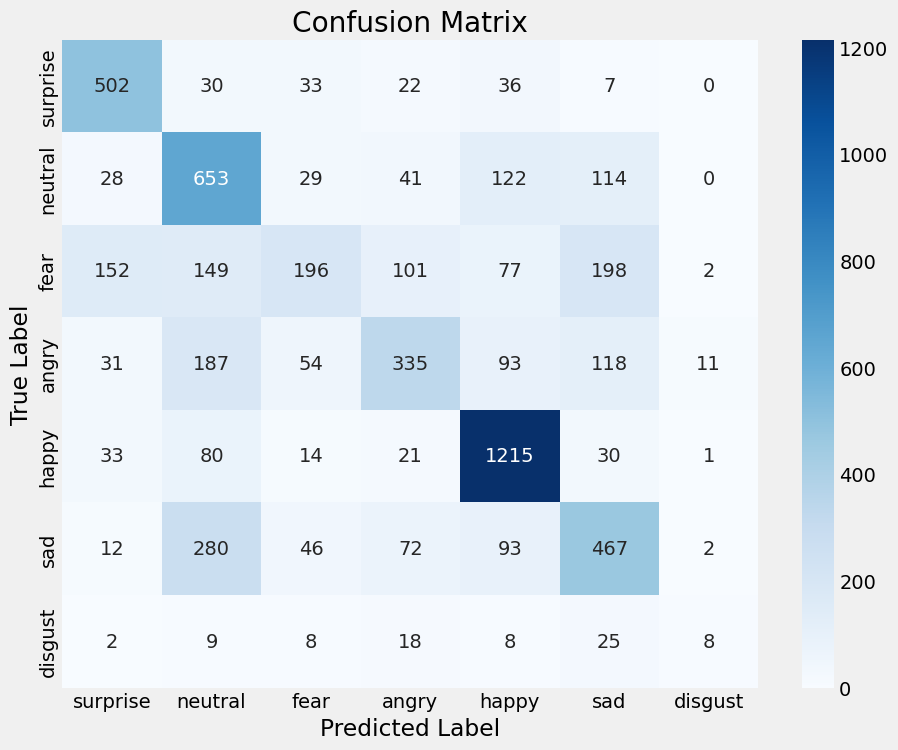

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

181/181 ━━━━━━━━━━━━━━━━━━━━ 26s 141ms/step


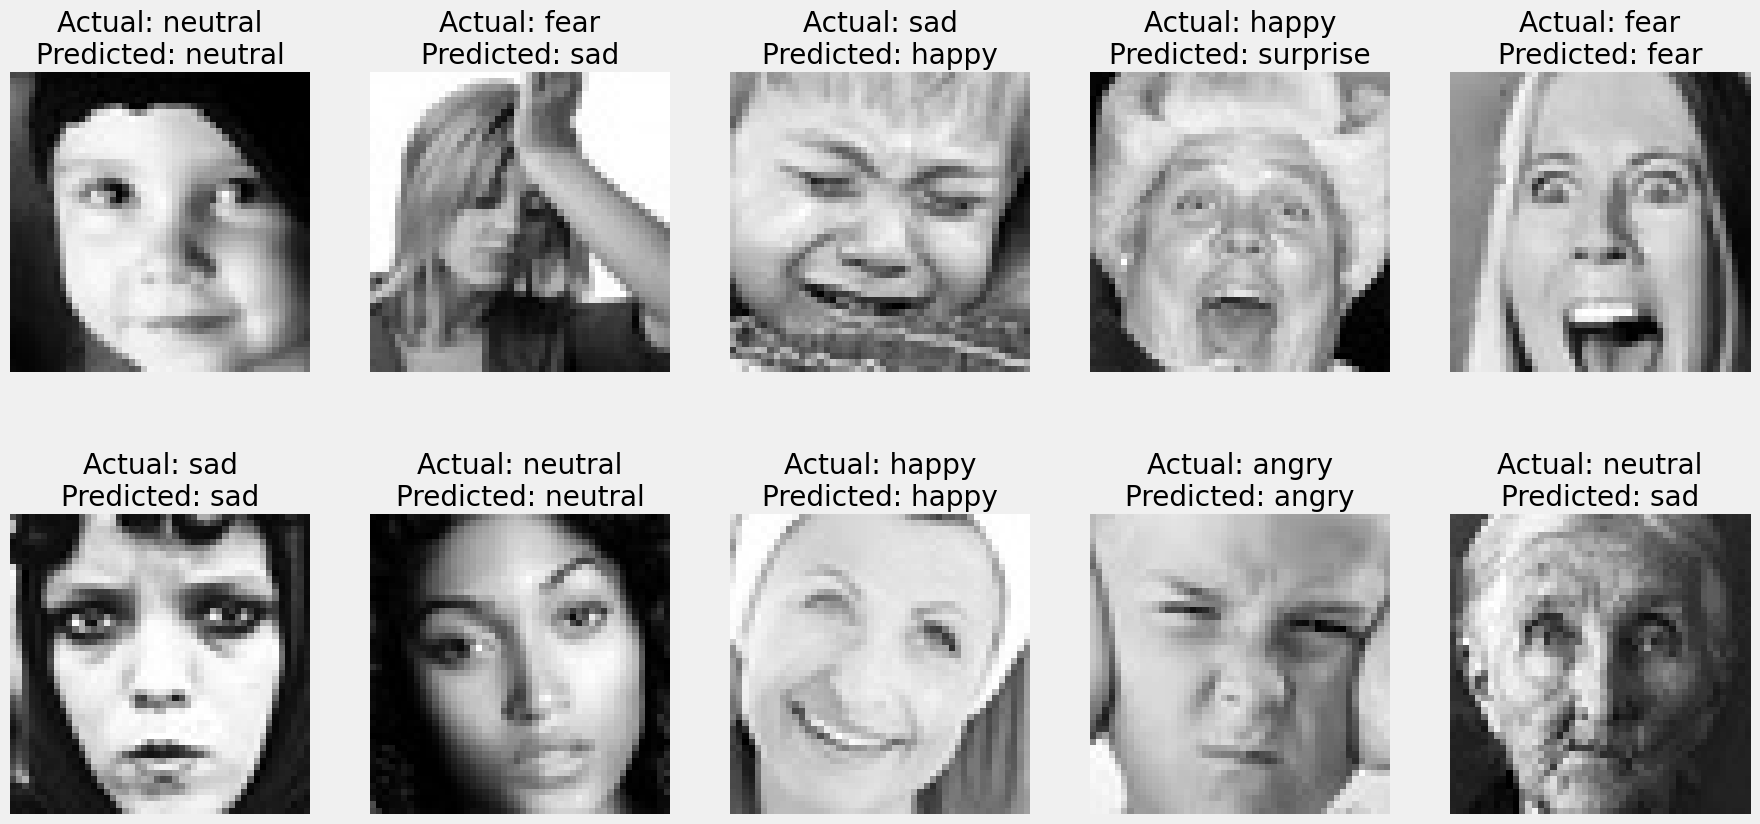

In [22]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Function to display images with predicted and actual labels
def display_images(images, actual_labels, predicted_labels, emotions, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        # Since the images are grayscale, we reshape them to (48, 48)
        img = images[i].reshape(IMG_SIZE, IMG_SIZE)
        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {emotions[actual_labels[i]]}\nPredicted: {emotions[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Display the images with predicted and actual labels
display_images(X_test, y_test, predicted_labels, EMOTIONS)

In [23]:
model.save("emotion_model.h5")


In [24]:
!pip install gradio


In [27]:
import gradio as gr
import cv2
import numpy as np
from tensorflow.keras.models import load_model

IMG_SIZE = 48
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']

# Load the model you trained
model = load_model("emotion_model.h5")

# Haarcascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def predict_emotion(img):
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        return "No face detected"

    x, y, w, h = faces[0]
    face = gray[y:y+h, x:x+w]
    face = cv2.resize(face, (IMG_SIZE, IMG_SIZE))
    face = face / 255.0
    face = face.reshape(1, IMG_SIZE, IMG_SIZE, 1)

    prediction = model.predict(face)
    emotion = EMOTIONS[np.argmax(prediction)]

    return emotion

interface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Image(label="Upload a face image"),
    outputs="text",
    title="Facial Emotion Detection"
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://da2109c03f40f757a2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
